In [2]:
import numpy as np
choince = ['H', 'T']
ra = np.random.choice(choince,200)
print(ra)

['H' 'H' 'H' 'H' 'T' 'H' 'H' 'T' 'H' 'H' 'T' 'T' 'H' 'H' 'H' 'H' 'H' 'T'
 'T' 'T' 'T' 'T' 'T' 'T' 'H' 'T' 'T' 'T' 'T' 'T' 'H' 'H' 'H' 'T' 'H' 'T'
 'T' 'T' 'T' 'T' 'T' 'H' 'T' 'T' 'H' 'H' 'H' 'H' 'H' 'T' 'T' 'H' 'H' 'T'
 'H' 'H' 'T' 'T' 'H' 'T' 'T' 'H' 'H' 'H' 'H' 'T' 'T' 'T' 'T' 'H' 'H' 'T'
 'H' 'T' 'H' 'H' 'T' 'H' 'T' 'H' 'T' 'H' 'H' 'T' 'H' 'H' 'H' 'H' 'T' 'H'
 'H' 'H' 'T' 'H' 'T' 'T' 'T' 'H' 'H' 'T' 'H' 'T' 'H' 'H' 'H' 'H' 'T' 'H'
 'H' 'T' 'T' 'H' 'T' 'T' 'T' 'H' 'T' 'T' 'T' 'T' 'H' 'T' 'H' 'T' 'T' 'H'
 'T' 'H' 'T' 'H' 'T' 'T' 'T' 'H' 'H' 'H' 'H' 'T' 'T' 'H' 'H' 'T' 'H' 'H'
 'H' 'T' 'T' 'H' 'H' 'T' 'H' 'T' 'T' 'T' 'T' 'T' 'H' 'H' 'H' 'T' 'H' 'H'
 'H' 'T' 'T' 'T' 'T' 'T' 'T' 'H' 'H' 'T' 'H' 'H' 'H' 'T' 'H' 'H' 'T' 'H'
 'T' 'T' 'T' 'H' 'T' 'T' 'H' 'H' 'H' 'H' 'H' 'H' 'T' 'T' 'T' 'H' 'T' 'H'
 'T' 'T']


In [4]:
j = np.where(ra == 'H',-1,1)

In [6]:
delta_a = np.where(np.diff(np.sign(j)) != 0)[0] + 1

In [8]:
delta_full = []
delta = [delta_a[i]-delta_a[i-1] for i in range(1,len(delta_a))]
print(delta)
ma_d = np.max(delta)
print('max delta', ma_d)
delta_full.append(ma_d)

[1, 2, 1, 2, 2, 5, 7, 1, 5, 3, 1, 1, 6, 1, 2, 5, 2, 2, 1, 2, 2, 1, 2, 4, 4, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 4, 1, 3, 1, 1, 3, 2, 1, 1, 1, 4, 1, 2, 2, 1, 3, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 4, 2, 2, 1, 3, 2, 2, 1, 1, 5, 3, 1, 3, 6, 2, 1, 3, 1, 2, 1, 1, 3, 1, 2, 6, 3, 1, 1, 1]
max delta 7


In [25]:
delta_full = []
cnt = 1000
choince = ['H', 'T']
for _ in range(cnt):
    ra = np.random.choice(choince,200)
    j = np.where(ra == 'H',-1,1)
    delta_a = np.where(np.diff(np.sign(j)) != 0)[0] + 1
    delta = [delta_a[i]-delta_a[i-1] for i in range(1,len(delta_a))]
    ma_d = np.max(delta)
    delta_full.append(ma_d)

unique, counts = np.unique(delta_full, return_counts=True)
np.set_printoptions(suppress=True)
result = np.column_stack((unique, counts))
at_least = np.flipud(np.cumsum(result[:,1]).reshape((-1,1)))
print(result)
at_ls_p = at_least/cnt*100
cnt_p = result[:,1].reshape((-1,1))/cnt*100
re = np.hstack((result, at_least,cnt_p, at_ls_p))
print(re)

[[  4   1]
 [  5  37]
 [  6 181]
 [  7 260]
 [  8 212]
 [  9 132]
 [ 10  96]
 [ 11  50]
 [ 12  15]
 [ 13  10]
 [ 14   4]
 [ 15   1]
 [ 20   1]]
[[   4.     1.  1000.     0.1  100. ]
 [   5.    37.   999.     3.7   99.9]
 [   6.   181.   998.    18.1   99.8]
 [   7.   260.   994.    26.    99.4]
 [   8.   212.   984.    21.2   98.4]
 [   9.   132.   969.    13.2   96.9]
 [  10.    96.   919.     9.6   91.9]
 [  11.    50.   823.     5.    82.3]
 [  12.    15.   691.     1.5   69.1]
 [  13.    10.   479.     1.    47.9]
 [  14.     4.   219.     0.4   21.9]
 [  15.     1.    38.     0.1    3.8]
 [  20.     1.     1.     0.1    0.1]]


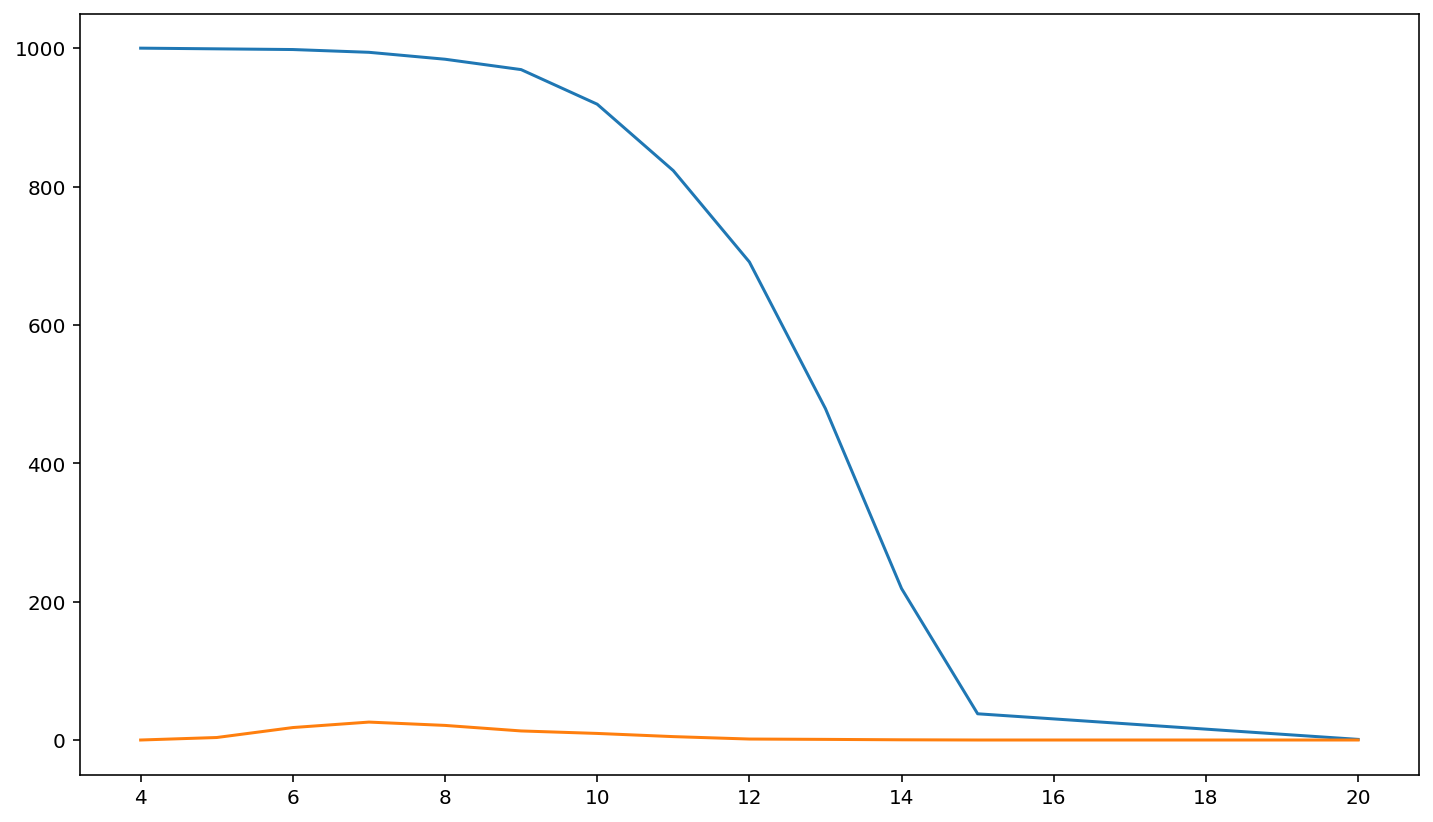

In [26]:
import matplotlib.pyplot as plt
plt.plot(re[:,0],re[:,2],re[:,0],re[:,3])